### Q1
Physics of springs is based on Hooke’s Law

\begin{equation*}
  F_{spring} = −ky
\end{equation*}
 
y is the vertical displacement from the equilibrium point. At equilibrium, the gravity force on the mass is equal to the spring force, and the net force is zero. We assume there is no damping force, thus in the problem, we will only consider the net force that is the spring force from vertical displacement from the equilibrium point.

k is the spring constant measured in N/m. Here we assume k is constant. 

Newton’s second law: $F= ma$ where $F=F_{spring}$

\begin{align*}
  ma &= −ky\\
  m\frac{d^2y}{dt^2} &= −ky\\
  \frac{d^2y}{dt^2} +\frac{k}{m}y&=0 
\end{align*}



## Q2

$\frac{d^2y}{dt^2} +\frac{k}{m}y=0$ tells us the acceleration at each poistion.  Given the the formula of acceleration, and the initial position and velocity, we can keep updating the velocity with acceleration, updating position with velocity as follows:
\begin{align*}
   \frac{dy}{dt} &= v\\
  \frac{dv}{dt} &= -\frac{k}{m}y&
\end{align*}

or 

\begin{align*}
   dy &= dtv\\
  dv &= -dt\frac{k}{m}y&
\end{align*}

Forward Euler method uses the derivative at the start of an interval to extrapolate forward.
Thus, we have:
\begin{align*}
  y_{i+1} &= y_i + \Delta t v_i\\
  v_{i+1} &= v_i - \Delta t \frac{k}{m}y_i\\
\end{align*}

## Q3 
Plot Distance vs. Time and calculate value of the spring constant, k

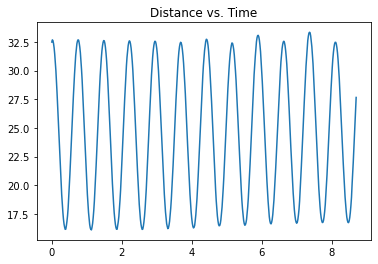

In [9]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("position.txt", skiprows=2, delimiter="\t")
fig, ax = plt.subplots()
ax.plot(data[:,0], data[:,1])
ax.set_title("Distance vs. Time")
plt.show()

The average period from data collected is  0.733s

The mass is 200g

Measured Angular frequency = $\frac{2*\pi}{0.733}$

Angular frequency =$ \sqrt{\frac{k}{m}}$

Therefore, k= $(\frac{2*\pi}{0.733} rad/s)^2*0.2kg = 14.70 kg/s^2$



## Q4 

Plot the data (position vs. time) and interpret 

In [17]:
class SpringMass():
    '''
    Spring-Mass Oscillation model

    === Attributes ===
    v: array of velocity
    y: array of position
    k: spring constant measured, implied_k = angular_freq**2*mass
    period: period of oscillation
    mass: mass of weight
    angular_freq: also known as omega, calulated as 2*np.pi/period or sqrt(k/mass)
    t: array of time stamps
    '''

    def __init__(self, v0, y0, mass, period):
        self.v = [v0]
        self.y = [y0]
        self.period = period
        self.angular_freq = 2 * np.pi / period
        self.k = self.angular_freq ** 2 * mass
        self.t = None
        # k=[k0]
        # u=[u0]

    def integrate(self, dt, t=10):
        '''
        update velocity and position based on Forward Euler

        :param dt: step size for integration
        :param t: range of time, default is 10 seconds
        '''
        t = np.arange(0, t, dt)
        for i in t[:-1]:  # the last time point is not used because Forward euler uses the starting values
            self.v.append(self.v[-1] - dt * (self.angular_freq ** 2) * self.y[-1])
            self.y.append(self.y[-1] + dt * self.v[-1])
        self.t = t

    def plot(self, y, x):
        '''
        plot according to specify x and y, for example
        position vs. time
        velocity vs. time
        velocity vs. position
        :param x:
        :param y:
        :return:
        '''
        mapping = {"position": self.y, "velocity": self.v, "time": self.t}

        fig, ax = plt.subplots()
        ax.plot(mapping[x], mapping[y], "red")
        ax.set_xlabel(x)
        ax.set_ylabel(y)
        ax.set_title(y+" vs " + x)
        plt.show()

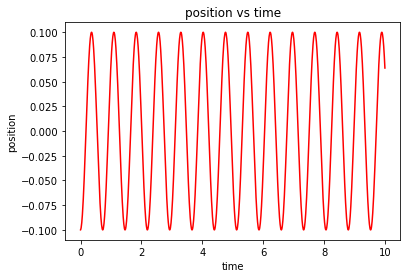

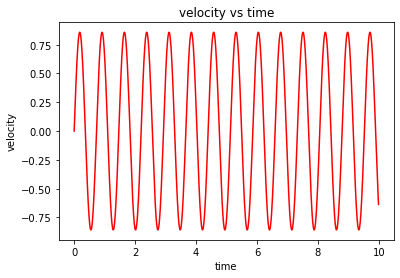

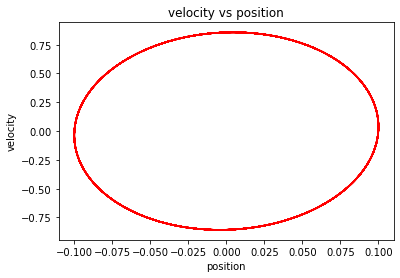

In [19]:
stepsize = 0.01 #[second]
T = 10 #[second]
mass = 0.2 #[kg]
start_velocity = 0
start_position = -0.1 #10cm below equilibrium position
period = 0.733 #[second]

model = SpringMass(start_velocity,start_position, mass, period)
model.integrate(stepsize)
model.plot("position", "time")
model.plot("velocity", "time")
model.plot("velocity", "position")

The plots confirm to my expection. Position vs Time and Velocity vs Time plots have sinusoid patterns. At equilibrium points, the velocity is the greatest. On highest and lowest points, the velocity is the smallest.